# calibration analysis

Ana the calibration parameters from different calibration runs

In [25]:
# general imports
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import tables
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
matplotlib.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
idate, ihour = time.strftime("%d/%m/%Y"), time.strftime("%H:%M:%S")
print('last visit {} at {}'.format(idate, ihour))

last visit 21/11/2016 at 19:43:59


In [27]:
idir = '/Users/hernando/Investigacion/NEXT/Data/NEWStar/sipmcalib/161117/'
runs = [2905]

In [28]:
def getpan(irun):
    ifile = 'calf_R'+str(irun)+'_pg_panda.h5'
    store = pd.HDFStore(idir+ifile)
    pan = store.df
    return pan

pans = map(getpan, runs)

In [29]:
nruns = len(runs)
def var(label,k):
    return np.array(map(lambda i: pans[i][label][k], range(nruns)))

nsens = 1792
sens = range(nsens)

In [30]:
labels = map(str, pans[0].columns)
print(labels)
dopan = {}
for label in labels:
    vmean, vstd = [], []
    for i in range(nsens):
        xvar = var(label,i)
        vmean.append(np.mean(xvar))
        vstd.append(np.std(xvar))
    dopan[label] = np.array(vmean)
    dopan['e'+label] =np.array(vstd)
opan = pd.DataFrame(dopan)

['chi2', 'gain', 'indexes', 'noise', 'noise-pe', 'ntot', 'pedestal', 'pes']


In [32]:
# opan['indexes'] = np.array([int(ind) for ind in opan['indexes']])
# opan.sort('indexes')
opan

,chi2,echi2,egain,eindexes,enoise,enoise-pe,entot,epedestal,epes,gain,indexes,noise,noise-pe,ntot,pedestal,pes
0,7.285210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.081978,1608.0,1.590720,1.979218,28855.766578,-0.162950,2.583690
1,3.987285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.043686,66.0,2.193454,2.004518,29239.509661,0.044129,1.834795
2,4.342005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.076555,1540.0,2.293402,1.689984,29242.390354,-0.131868,0.903370
3,5.642520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.179527,715.0,1.966927,2.097019,29160.211090,-0.025173,2.771298
4,5.353111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.725564,610.0,2.268155,1.961252,29280.658917,-0.481470,2.621368
5,4.253366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.787624,1233.0,1.986768,1.673366,29250.776037,-0.231056,1.620746
6,2.618670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.708094,78.0,2.818312,1.812457,29514.923225,-0.033513,0.366097
7,5.732903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.764835,440.0,1.941763,2.010290,29001.807087,-0.149928,2.337613
8,5.403934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.498274,1407.0,2.016503,1.960104,29318.468138,0.020598,2.620139
9,11.196827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.144690,1779.0,1.617530,1.850514,28177.443215,-0.240485,0.266341


In [8]:
import Database.loadDB as db

sipmdb = db.DataSiPM()

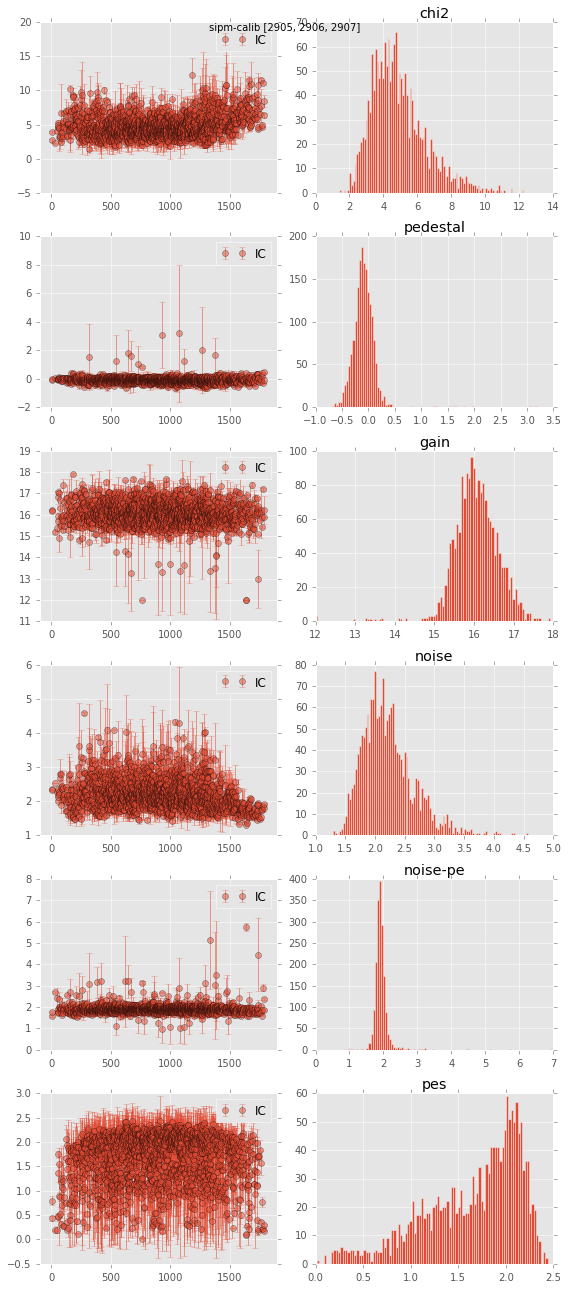

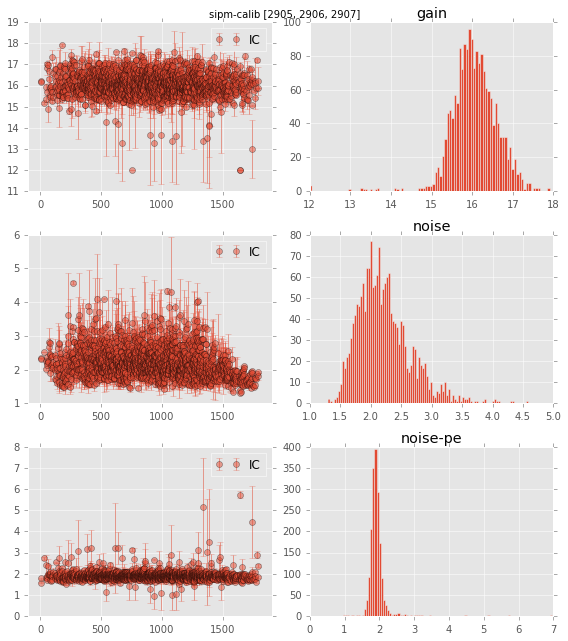

In [9]:
import calib as sc

def xyey_(label):
    x = opan['indexes']
    y = opan[label]
    ey = opan['e'+label]
    vals = zip(x.values,y.values,ey.values)
    vals.sort()
    x = np.array(map(lambda val: val[0], vals))
    y = np.array(map(lambda val: val[1], vals))
    ey = np.array(map(lambda val: val[2], vals))
    return x,y,ey

def polo_sens(labels, title=''):
    n = len(labels)
    fig, axs = plt.subplots(n, 2, figsize=(8, 3*n))
    plt.suptitle(title)
    for i, label in enumerate(labels):
        ax = plt.subplot(n, 2, 2*i+1)
        x, y, ey = xyey_(label)
        ax.errorbar(x, y, ey, fmt='o', label='IC', alpha=0.5)
        ax.legend()
        plt.xlim(-100., 1900.)
        ax = plt.subplot(n, 2, 2*i+2)
        ax.set_title(label)
        ax.hist(y, bins=100)
    fig.tight_layout()
    plt.show()
    return fig

                       
ilabels = ['chi2', 'pedestal', 'gain', 'noise', 'noise-pe', 'pes']
fig = polo_sens(ilabels, 'sipm-calib [2905, 2906, 2907]')
fig.savefig(idir+'sipm_calib_summary.pdf')

ilabels = ['gain', 'noise', 'noise-pe']
fig = polo_sens(ilabels, 'sipm-calib [2905, 2906, 2907]')
fig.savefig(idir+'sipm_calib_summary_main.pdf')


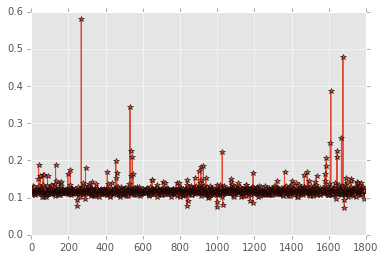

In [10]:
rat = opan['noise-pe']/opan['gain']
plt.plot(rat, marker='*')

In [12]:
opan.to_csv(idir+'sipm_calib_summary.cvs')
opan.to_hdf(idir+'sipm_calib_summary.h5','df',mode='w',format='table',data_columns=True)

In [13]:
sipmdb

,sensorID,active,x,y,adc_to_pes,noise_rms
0,1000,1,-235.0,45.0,16.6974,0.0
1,1001,1,-235.0,55.0,15.9397,0.0
2,1002,1,-235.0,65.0,17.6442,0.0
3,1003,1,-235.0,75.0,16.4338,0.0
4,1004,1,-235.0,85.0,17.3464,0.0
5,1005,1,-235.0,95.0,17.0949,0.0
6,1006,1,-235.0,105.0,15.6702,0.0
7,1007,1,-235.0,115.0,15.8094,0.0
8,1008,1,-225.0,45.0,16.4761,0.0
9,1009,1,-225.0,55.0,16.5684,0.0


In [ ]:
def compare('label')